In [1]:
print ("Juan Hubert Liem - 0706022210013")

Juan Hubert Liem - 0706022210013


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/juanhubertl8010/dataset/refs/heads/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


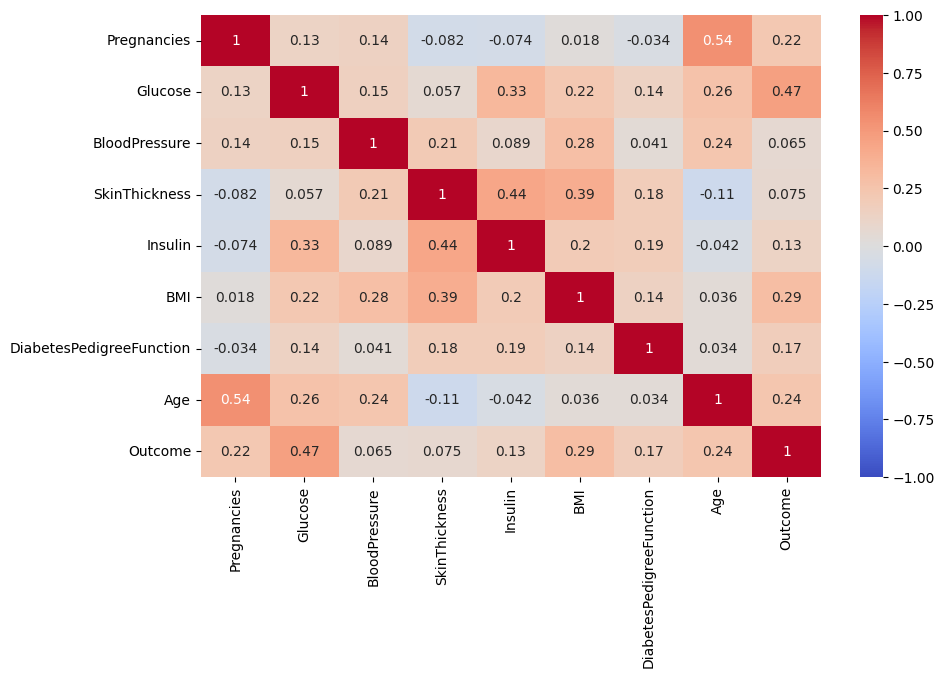

Heatmap ini menunjukkan korelasi setiap kolom pada dataset diabetes. Dapat dilihat korelasi antara glukosa dengan outcome ini positif, yang berarti semakin tinggi gula maka semakin tinggi juga potensi terkena diabetes


In [11]:

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.show()

print("Heatmap ini menunjukkan korelasi setiap kolom pada dataset diabetes. Dapat dilihat korelasi antara glukosa dengan outcome ini positif, yang berarti semakin tinggi gula maka semakin tinggi juga potensi terkena diabetes")

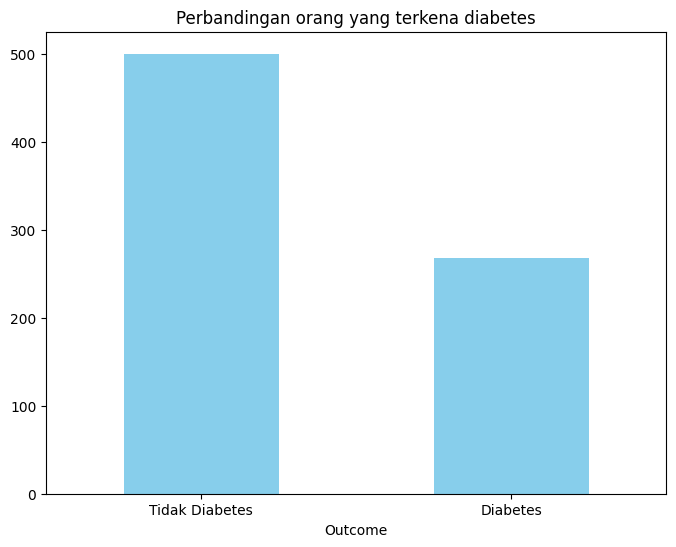

ini adalah salah satu visualisasi data yang diperoleh dari dataset diabetes. dapat dilihat berdasarkan dataset tersebut orang yang kemungkinan terkena diabetes lebih sedikit daripada orang yang kemungkinan tidak terkena diabetes


In [12]:
outcome_counts = df['Outcome'].value_counts()

plt.figure(figsize=(8,6))
outcome_counts.plot(kind='bar', color='skyblue')#Membuat barchart (isi datanya)
plt.title('Perbandingan orang yang terkena diabetes')
plt.xticks(ticks=[0, 1], labels=['Tidak Diabetes', 'Diabetes'], rotation=0)  # Mengatur label x
plt.show()

print("ini adalah salah satu visualisasi data yang diperoleh dari dataset diabetes. dapat dilihat berdasarkan dataset tersebut orang yang kemungkinan terkena diabetes lebih sedikit daripada orang yang kemungkinan tidak terkena diabetes")

In [13]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)


# **Decision Tree with Gini**

In [16]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [17]:
y_pred_gini = clf_gini.predict(x_test)

In [18]:
print("Model accuracy  score with criterion gini: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy  score with criterion gini: 0.7597


In [19]:
print("Training set score: {0:0.4f}".format(clf_gini.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(x_test,y_test)))

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

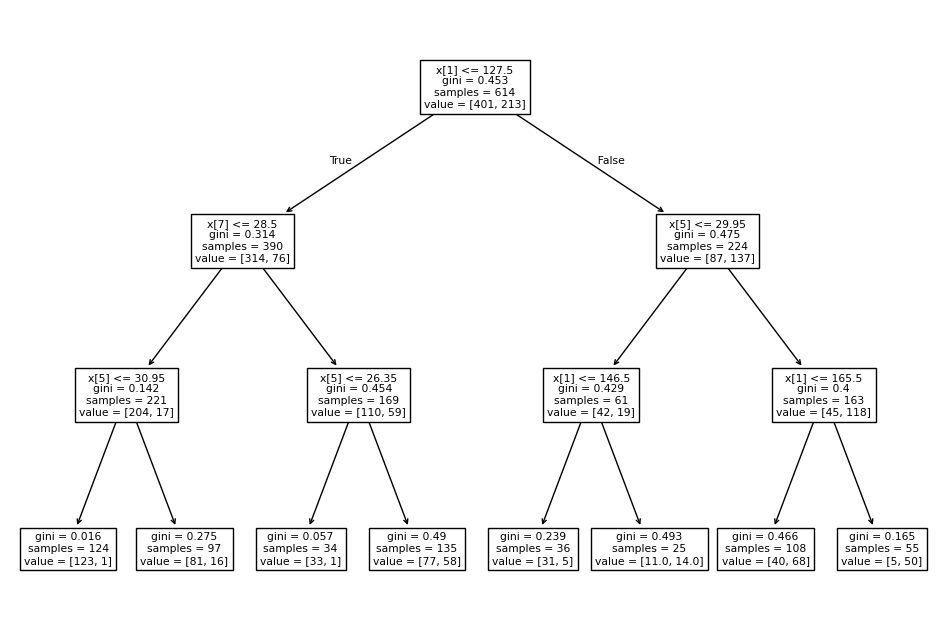

In [20]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [23]:
print("Confusion matrix decision tree with gini")
cy = confusion_matrix(y_test, y_pred_gini)
cy

Confusion matrix decision tree with gini


array([[83, 16],
       [21, 34]])

In [24]:
print("classification report with gini")
print(classification_report(y_test, y_pred_gini))
print("akurasi klasifikasi report menggunakan gini untuk dataset ini sekitar 76%")

classification report with gini
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

akurasi klasifikasi report menggunakan gini untuk dataset ini sekitar 76%


## **Naive Bayes**

In [25]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [26]:
nb_y_pred = nb_classifier.predict(x_test)

In [27]:
print("Model accuracy  score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test,nb_y_pred)))

#d


cm = confusion_matrix(y_test, nb_y_pred)
cm

Model accuracy  score with Naive Bayes: 0.7662


array([[79, 20],
       [16, 39]])

In [29]:
print("Classification Report Naive Bayes")
print(classification_report(y_test, nb_y_pred))
print("klasisfikasi report naive bayes untuk dataset diabetes ini diperoleh akurasi 77 persen")

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

klasisfikasi report naive bayes untuk dataset diabetes ini diperoleh akurasi 77 persen


# **K-Nearest Neighbors (KNN)**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(x_test_scaled)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.69


In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[79, 20],
       [27, 28]])

In [38]:
print(classification_report(y_test, y_pred))
print("Dataset ini apabila diklasifikasikan menggunakan KNN diperoleh akurasi sekitar 69 persen")

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

Dataset ini apabila diklasifikasikan menggunakan KNN diperoleh akurasi sekitar 69 persen
